## Library Import

In [ ]:
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## Read The Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cust  = pd.read_csv ("/content/drive/MyDrive/VIX/Kalbe/Case Study - Customer.csv", delimiter = ";")
prod  = pd.read_csv ("/content/drive/MyDrive/VIX/Kalbe/Case Study - Product.csv", delimiter = ";")
store = pd.read_csv ("/content/drive/MyDrive/VIX/Kalbe/Case Study - Store.csv", delimiter = ";")
trans = pd.read_csv ("/content/drive/MyDrive/VIX/Kalbe/Case Study - Transaction.csv", delimiter = ";")

## Dataset Dictionary

This dataset consists of 4 CSV files: customer, store, product, and transaction. It is dummy data for an FMCG case study over a span of 1 year, collected through a membership program.

| Table Name | Column Name | Description |
|------|---------|---------|
| **Customer** | CustomerID | Unique Identifier for each Customer |
|  | Gender | 0 : Female</br> 1 : Male |
|  | Marital Status | Married </br> Single (Divorced or Not yet Married |
|  | Income | Income per Month (Million IDR) |
|  |  |  |  |
| **Store** | StoreID | Unique Identifier for each Store |
|  | StoreName | Store Name |
|  | GroupStore | Store Group |
|  | Type | Modern Trade</br>General Trade |
|  | Latitude | Latitude Code |
|  | Longitude | Longitude Code |
|  |  |  |  |
| **Product** | ProductID | Unique Identifier for each Product |
|  | Product Name | Product Name |
|  | Price | Price of Product (IDR) |
|  |  |  |  |
| **Transaction** | TransactionID | Unique Identifier for each Transaction |
|  | Date | Date of Transaction |
|  | Qty | The quantity of products purchased. |
|  | TotalAmount | Revenue (Price x Qty) |

## Brief Overview of Each Dataset

In [ ]:
cust.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [ ]:
prod.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [ ]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [ ]:
trans.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


### Note:
Exploratory Data Analysis (EDA) was conducted using DBeaver. You can review the analysis in the `.psql` file.

## Data Cleaning

### Check Missing Values, Duplicated Values, and Data Type

In [ ]:
datasets = {
     "Customer" : cust,
     "Product"  : prod,
     "Store"    : store,
     "Transaction" : trans }

In [ ]:
def data_check (datasets):
    results = {}

    for name, dataset in datasets.items():

        # Check for missing values
        missing_values = dataset.isnull().sum()
        missing_percentage = round (missing_values/len(dataset)*100, 2)
        data_type = dataset.dtypes
        missing_data = pd.concat ([missing_values, missing_percentage, data_type],
                                 keys = ["missing_count", "missing_percentage", "data_type"],
                                 axis = 1)

        # Check for duplicate rows
        duplicate_rows = dataset.duplicated().sum()

        # Check Data Shape
        data_shape = dataset.shape

        # Check Nunique Values for each ID
        ids = dataset.columns[0]
        nunique_values = dataset[ids].nunique()

        results[name] = {
            "missing_values": missing_data,
            "duplicate_rows": duplicate_rows,
            "data_shape" : data_shape,
            "ids" : ids,
            "nunique_ids" : nunique_values}
    return results

In [ ]:
results = data_check (datasets)

for name, result in results.items():
    print(f"Dataset: {name}")
    print("Missing Values:")
    print (result["missing_values"])
    print("\nDuplicate Rows:")
    print(result["duplicate_rows"])
    print(f"\nData Shape : {result ['data_shape']}")
    print(f"Count of Unique Values of {result ['ids']} : {result['nunique_ids']}")
    print("=" * 60, "\n")

Dataset: Customer
Missing Values:
                missing_count  missing_percentage data_type
CustomerID                  0                0.00     int64
Age                         0                0.00     int64
Gender                      0                0.00     int64
Marital Status              3                0.67    object
Income                      0                0.00    object

Duplicate Rows:
0

Data Shape : (447, 5)
Count of Unique Values of CustomerID : 447

Dataset: Product
Missing Values:
              missing_count  missing_percentage data_type
ProductID                 0                 0.0    object
Product Name              0                 0.0    object
Price                     0                 0.0     int64

Duplicate Rows:
0

Data Shape : (10, 3)
Count of Unique Values of ProductID : 10

Dataset: Store
Missing Values:
            missing_count  missing_percentage data_type
StoreID                 0                 0.0     int64
StoreName               0    

From the above result, we can see that:
</br>

**1. Customer dataset:**
- has missing values in Marital Status column with count of 3
- has no duplicated values
- data type for Income column is Object. This data type should be changed to Float to make it more suitable data type
- The data shapes and the count of unique ID values match.

**2. Product dataset:**
- has no missing and duplicated values
- data type for each column is good
- The data shapes and the count of unique ID values match.

**3. Store dataset:**
- has no missing and duplicated values
- data type for Latitude and Longitude columns are Object. These data types should be changed to Float to make it more suitable data type
- The data shapes and the count of unique ID values match.

**4. Transaction dataset:**
- has no missing and duplicated values
- data type for Date column is Object. This data type should be changed to Date time to make it more suitable data type
- The data shapes and the count of unique ID values do not match. This indicates duplicated values in the TransactionID column

#### 1. Customer Dataset : Income Column

##### Handling Missing Values

In [ ]:
# Fill the missing values using the mode

cust ["Marital Status"].fillna (cust ["Marital Status"].mode()[0], inplace = True)

In [ ]:
# Check the result

cust.isnull().sum().sum()

0

##### Change Data Type From Object to Float

In [ ]:
cust ["Income"] = cust ["Income"].apply(lambda x: x.replace(",", ".")).astype (float)

In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  447 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


#### 2. Store Dataset : Latitude and Longitude Columns

##### Change Data Type From Object to Float

In [ ]:
store ["Longitude"] = store ["Longitude"].apply(lambda x: x.replace(",", ".")).astype(float)
store ["Latitude"] = store ["Latitude"].apply(lambda x: x.replace(",", ".")).astype(float)

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


#### 3. Transaction Dataset : Date Column

##### Change Data Type From Object to Datetime

In [ ]:
trans ["Date"] = pd.to_datetime (trans ["Date"], dayfirst = True)

In [ ]:
# Check the format of date column

date_col = trans ["Date"]
format_date = "%d/%m/%y"

try:
    parsed_date = pd.to_datetime(date_col, format = format_date)
    print("Date string matches the desired format.")
    print("Parsed date:\n", parsed_date)
except ValueError:
    print("Date string does not match the desired format.")

Date string matches the desired format.
Parsed date:
 0      2022-01-01
1      2022-01-01
2      2022-01-01
3      2022-01-01
4      2022-01-01
          ...    
5015   2022-12-31
5016   2022-12-31
5017   2022-12-31
5018   2022-12-31
5019   2022-12-31
Name: Date, Length: 5020, dtype: datetime64[ns]


##### Drop Duplicated Values
Duplicated Values in the TransactionID will be handled after merging all of the datasets. This will help us to identify the duplicated values with more comprehensive information from all of the datasets.

## Merge Datasets

In [ ]:
df1 = pd.merge(cust, trans, on = "CustomerID", how = "inner")
df2 = pd.merge(df1, prod, on = "ProductID", how = "inner")
df_merged = pd.merge(df2, store, on = "StoreID", how = "inner")

In [ ]:
df_merged.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,5.12,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,-3.654703,128.190643
1,5,58,1,Married,3.57,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,-3.654703,128.190643
2,7,31,0,Married,4.57,TR5151,2022-03-10,P8,16000,2,32000,9,Oat,16000,Lingga,Lingga,Modern Trade,-3.654703,128.190643
3,19,24,1,Single,4.14,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,-3.654703,128.190643
4,28,55,0,Married,6.08,TR9420,2022-01-12,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,-3.654703,128.190643


In [ ]:
# Price_y and Price_x have the same values, so we will drop one of them

df_merged.drop (columns = ("Price_y"), inplace = True)

In [ ]:
df_merged.rename (columns = {"Price_x": "Price"}, inplace = True)

### Check Unique Values from TransactionID

In [ ]:
# Check transactionID
print ("total rows data :", df_merged.shape [0])
print ("total unique TransactionID :", df_merged ["TransactionID"].nunique())
print ("duplicated TransactionID :", df_merged ["TransactionID"].duplicated().sum())

total rows data : 5020
total unique TransactionID : 4908
duplicated TransactionID : 112


TransactionID should be unique for each transaction, but as the above result shows that there 112 duplicated TransactionID

In [ ]:
# Check the duplicated Transaction ID

dup_transID = df_merged [df_merged ["TransactionID"].duplicated (keep = False)]
dup_count = dup_transID.groupby ("TransactionID").size()
dup_count.unique()

array([2, 3])

In [ ]:
# Find the TransactionID with more than 2 duplicates

dup_more = dup_count [dup_count > 2]
dup_more

TransactionID
TR71313    3
dtype: int64

In [ ]:
# Check the TransactionID

df_merged [df_merged ["TransactionID"] == "TR71313"]

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
1510,401,45,0,Married,4.08,TR71313,2022-08-30,P3,7500,6,45000,11,Crackers,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403
4027,370,26,1,Single,1.28,TR71313,2022-09-26,P3,7500,2,15000,3,Crackers,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
4462,117,45,1,Married,12.55,TR71313,2022-05-21,P1,8800,10,88000,8,Choco Bar,Sinar Harapan,Harapan Baru,General Trade,5.548290,95.323753


The result shows duplicated TransactionIDs with different CustomerIDs. TransactionID should be unique so it can be used to trace each transaction. It's not expected to have the same TransactionID associated with different CustomerIDs, especially when there are discrepancies in the transaction dates. This kind of situation indicates underlying data or process issues.</br>

In [ ]:
# Check The Other TransactionIDs using same CustomerID and ProductID

df_merged [(df_merged ["CustomerID"] == 401) & (df_merged ["ProductID"] == "P5")]

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
2106,401,45,0,Married,4.08,TR8508,2022-01-17,P5,4200,4,16800,14,Thai Tea,Priangan,Priangan,Modern Trade,-5.450000,105.266670
2107,401,45,0,Married,4.08,TR12978,2022-05-09,P5,4200,2,8400,14,Thai Tea,Priangan,Priangan,Modern Trade,-5.450000,105.266670
2459,401,45,0,Married,4.08,TR66037,2022-04-12,P5,4200,3,12600,10,Thai Tea,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513
4972,401,45,0,Married,4.08,TR61103,2022-05-08,P5,4200,2,8400,7,Thai Tea,Buana Indah,Buana,General Trade,3.316694,114.590111


TransactionID should be like this. Each transaction has a different TransactionID even if it has the same CustomerID, ProductID, and StoreID. But there's a difference in other information like the Date of the Transaction is made.

Based on these findings, the data rows with duplicated TransactionIDs will be removed, keeping only one row with the earliest transaction time according to the date column.

### Drop Duplicated TransactionID

In [ ]:
# Sort the data based on the Date column
df_merged.sort_values ("Date", inplace = True)

# Drop duplicated transactionID and only keep the earliest transactionID based on Date column
df_merged.drop_duplicates (subset = "TransactionID", keep = "first", inplace = True)

In [ ]:
# Reset the index of the dataset
df_merged.reset_index(drop = True, inplace = True)
df_merged.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,283,19,1,Single,0.00,TR51675,2022-01-01,P10,15000,1,15000,5,Cheese Stick,Bonafid,Gita,General Trade,-7.250445,112.768845
1,328,36,0,Married,10.53,TR11369,2022-01-01,P3,7500,4,30000,12,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,233,43,1,Married,5.69,TR97336,2022-01-01,P7,9400,2,18800,12,Coffee Candy,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,386,33,0,Married,6.95,TR41231,2022-01-01,P9,10000,1,10000,4,Yoghurt,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,183,27,1,Single,0.18,TR1984,2022-01-01,P1,8800,4,35200,4,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [ ]:
df_merged.shape

(4908, 18)

# <center>Data Preparation<center>

## 1. Group By For Time Series Dataset

In [ ]:
df_ts = df_merged.groupby ("Date").agg ({"Qty" : "sum"}).reset_index()
df_ts.head(13)

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
5,2022-01-06,71
6,2022-01-07,37
7,2022-01-08,47
8,2022-01-09,47
9,2022-01-10,60


The date format of df_merged ["Date"] is `"yyyy/mm/dd"` and by default it's sorted by **month** value of Date column

### **Comparison**

In [ ]:
# Import the original dataset of transaction

transc_ori = pd.read_csv ("/content/drive/MyDrive/VIX/Kalbe/Case Study - Transaction.csv", sep = ";")

In [ ]:
# Group by date

transc_ori = transc_ori.groupby ("Date").agg ({"Qty" : "sum"}).reset_index()
transc_ori.head(13)

,Date,Qty
0,01/01/2022,49
1,01/02/2022,50
2,01/03/2022,76
3,01/04/2022,98
4,01/05/2022,67
5,01/06/2022,67
6,01/07/2022,99
7,01/08/2022,56
8,01/09/2022,27
9,01/10/2022,85


The format date of Date column from the original dataset of transaction is `"dd/mm/yyyy"` and by default it's sorted by **day** value of Date column. This is why the result does not match with df_ts group by

In [ ]:
# Check The result based on the first 5 days of january from the original dataset of transaction
# This is to match the result with groupby Date from df_ts

print (transc_ori [transc_ori ["Date"] == "01/01/2022"])
print (transc_ori [transc_ori ["Date"] == "02/01/2022"])
print (transc_ori [transc_ori ["Date"] == "03/01/2022"])
print (transc_ori [transc_ori ["Date"] == "04/01/2022"])
print (transc_ori [transc_ori ["Date"] == "05/01/2022"])

         Date  Qty
0  01/01/2022   49
          Date  Qty
12  02/01/2022   59
          Date  Qty
24  03/01/2022   63
          Date  Qty
36  04/01/2022   45
          Date  Qty
48  05/01/2022   30


From the above result between groupby **Date** of :
- df_ts that we've converted and
- the first 5 days of the original dataset of transaction

we can see that the result of total quantity is the same. This means that we have successfully converted the Date column the right way.

In [ ]:
# We need to set date column as the index

df_ts = df_ts.set_index ("Date")

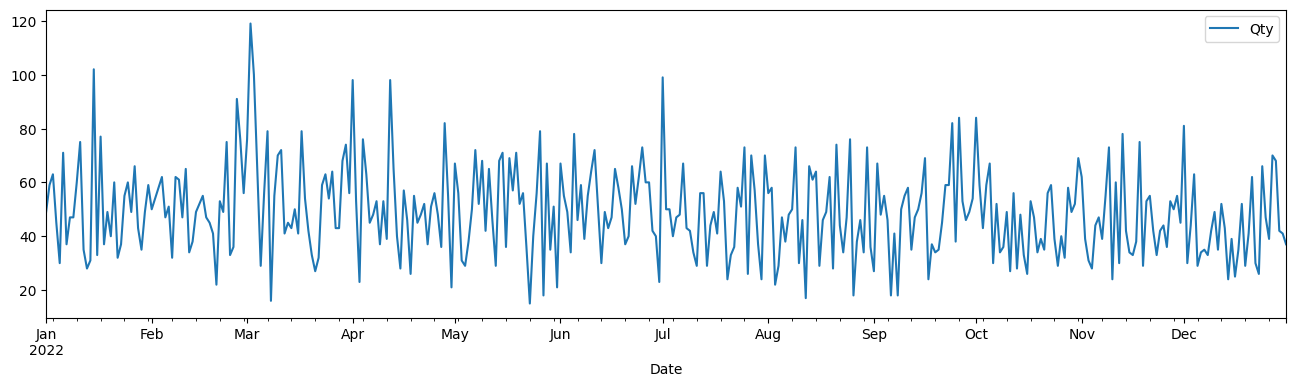

In [ ]:
df_ts.plot(figsize = (16,4))
plt.show()

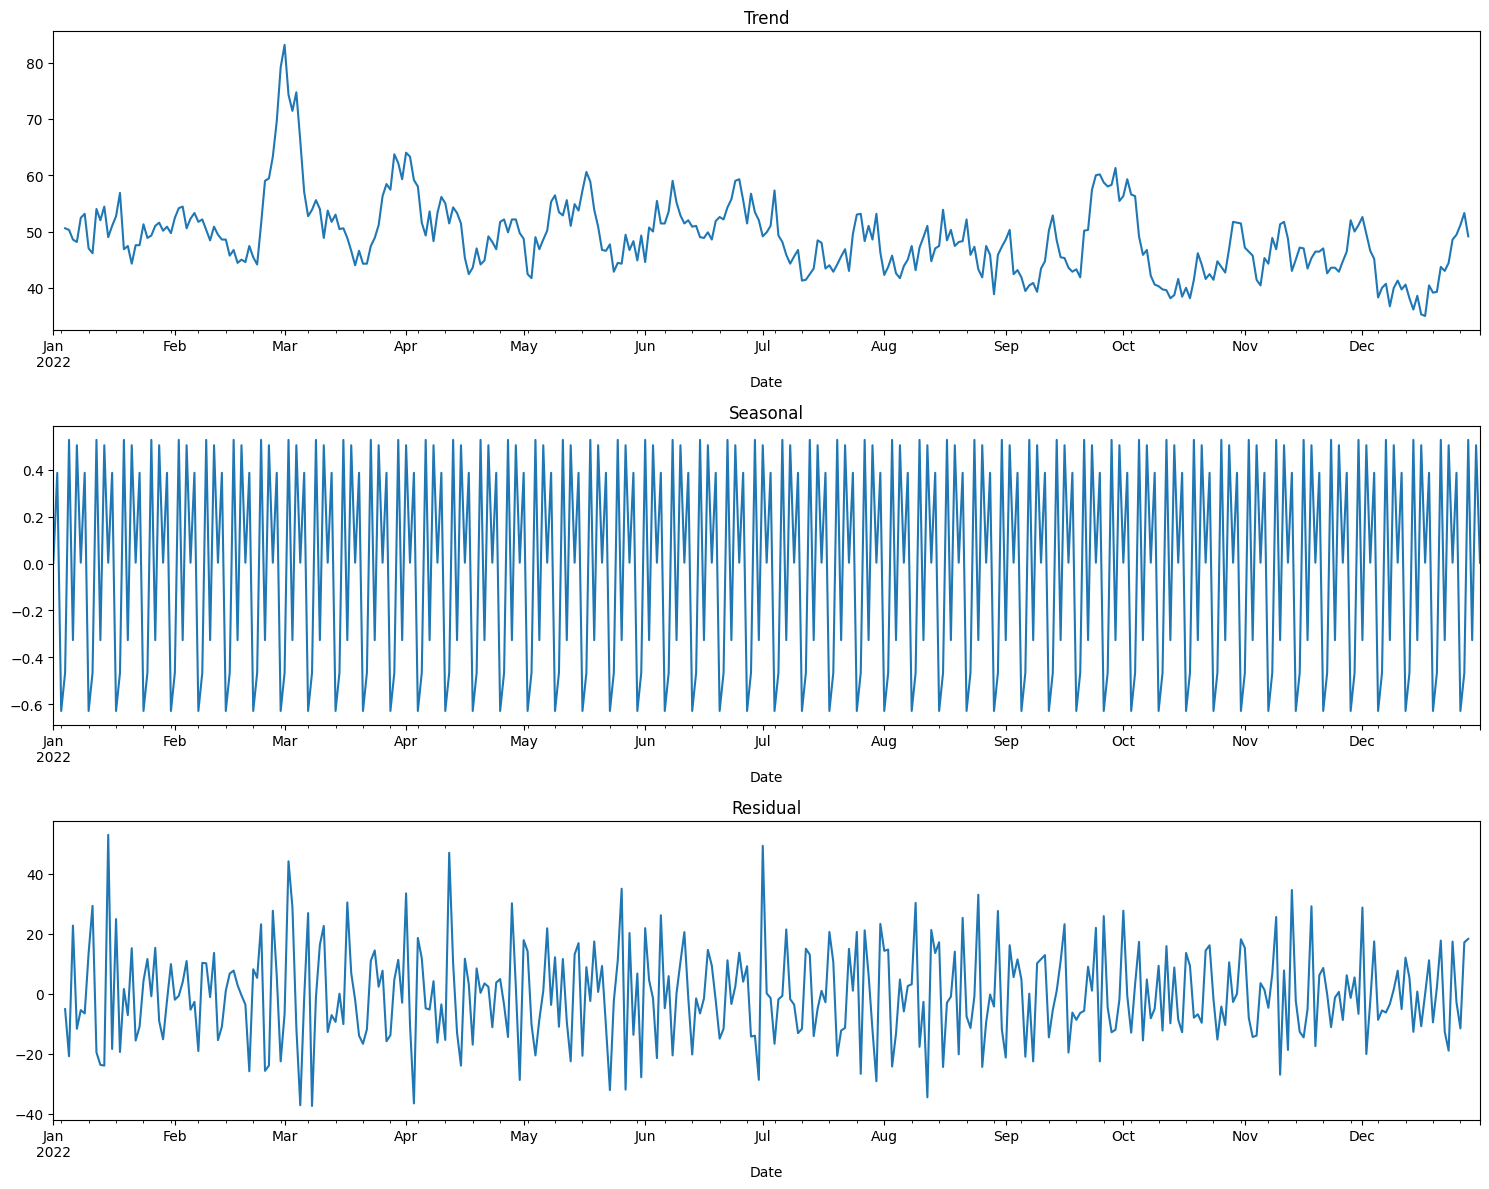

In [ ]:
# Check for the trend seasonality and residual
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_ts)

fig,ax = plt.subplots(3,1,figsize=(15,12))
decompose.trend.plot(ax=ax[0])
ax[0].set_title('Trend')
decompose.seasonal.plot(ax=ax[1])
ax[1].set_title('Seasonal')
decompose.resid.plot(ax=ax[2])
ax[2].set_title('Residual')

plt.tight_layout()
plt.show()

## 2. Stationarity Test

Stationarity is an important concept in time series analysis because many time series models like ARIMA assume that the data is stationary. To check the stationarity we use 2 methods, first method is using rolling mean and rolling std and visualize it using plot, second method is using The Augmented Dickey-Fuller or ADF-Test.

In [ ]:
def stationarity_test (dataset, col):
    # Rolling mean and std:
    roll_mean = dataset[col].rolling(window=12).mean()
    roll_std = dataset[col].rolling (window = 12).std()

    # Visualize:
    plt.figure (figsize = (15,5))

    plt.plot(dataset, label= "Original")
    plt.plot(roll_mean, label= "Rolling Mean")
    plt.plot(roll_std, label= "Rolling Std")
    plt.legend(loc='best')
    plt.title("Stationarity Test by Rolling Mean & Rolling Standard Deviation")
    plt.show()

    # Augmented Dickey–Fuller (ADF - test)
    from statsmodels.tsa.stattools import adfuller
    print ("Stationarity Test by ADF - Test :\n")
    adf_test = adfuller(dataset[col], autolag = "AIC")
    output = pd.Series(adf_test[0:4], index=["Test Statistic :", "p-value :", "Number of Lags Used :", "Number of Observations Used :"])

    for key,value in adf_test[4].items():
        output ["Critical Value (%s) :" %key] = value
    print (output)

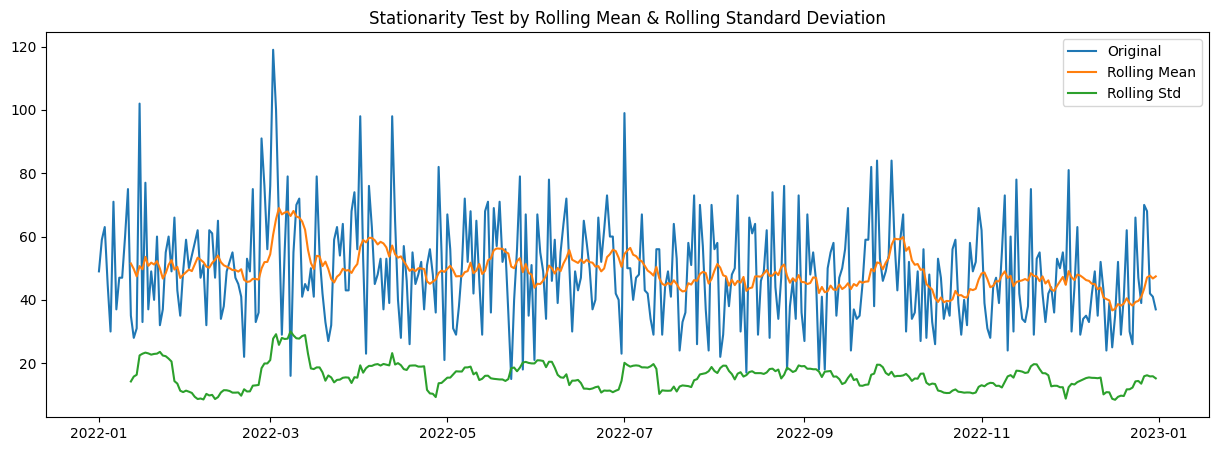

Stationarity Test by ADF - Test :

Test Statistic :                 -18.844276
p-value :                          0.000000
Number of Lags Used :              0.000000
Number of Observations Used :    364.000000
Critical Value (1%) :             -3.448443
Critical Value (5%) :             -2.869513
Critical Value (10%) :            -2.571018
dtype: float64


In [ ]:
stationarity_test (df_ts, "Qty")

From the stationarity_test, we can see that the df_ts is stationary based on p-value which is less than significance level (0.0000 < 0.05)

## 3. ACF and PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

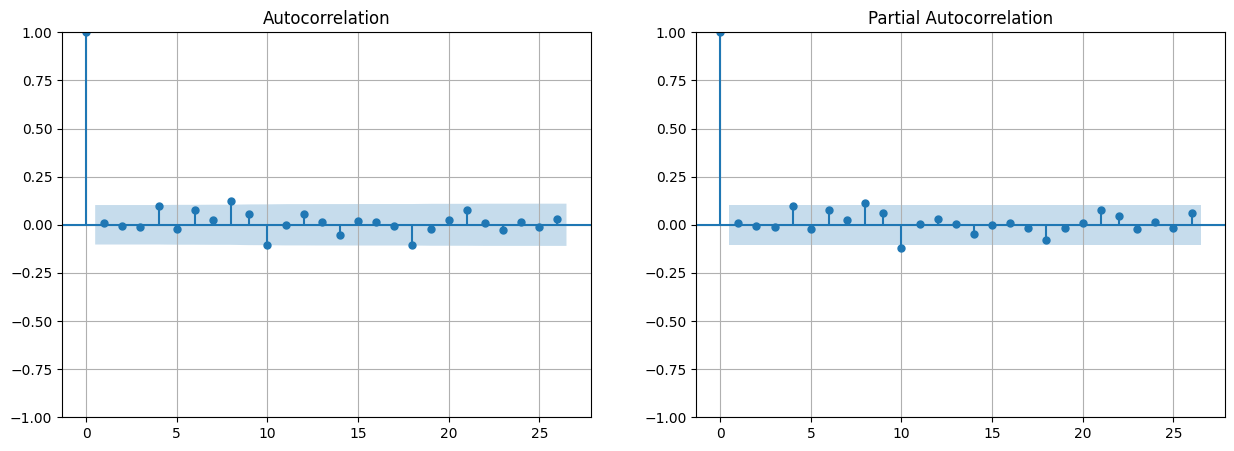

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(df_ts, ax=ax[0])
ax[0].grid()
plot_pacf(df_ts, ax=ax[1])
ax[1].grid()
plt.show()

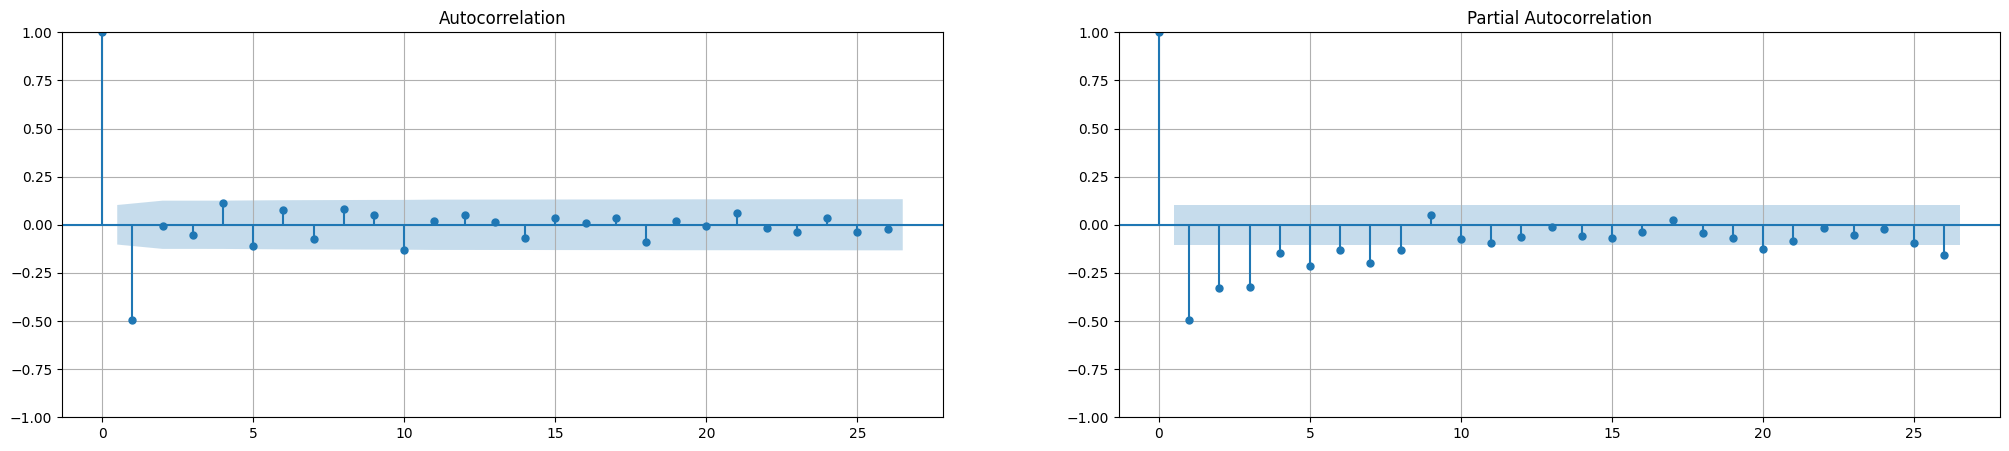

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 5))
plot_acf(df_ts.diff().dropna(), ax=ax[0])
ax[0].grid()
plot_pacf(df_ts.diff().dropna(), ax=ax[1])
ax[1].grid()
plt.show()

## 4. Split Data Train and Data Test

In [ ]:
# 80% for data train
# 20% for data test

print("dataset shape :", df_ts.shape)

test_size = round(df_ts.shape[0] * 0.2)
df_train=df_ts.iloc[:-1*(test_size)]
df_test=df_ts.iloc[-1*(test_size):]

print("data train shape:", df_train.shape)
print ("data test shape :", df_test.shape)

dataset shape : (365, 1)
data train shape: (292, 1)
data test shape : (73, 1)


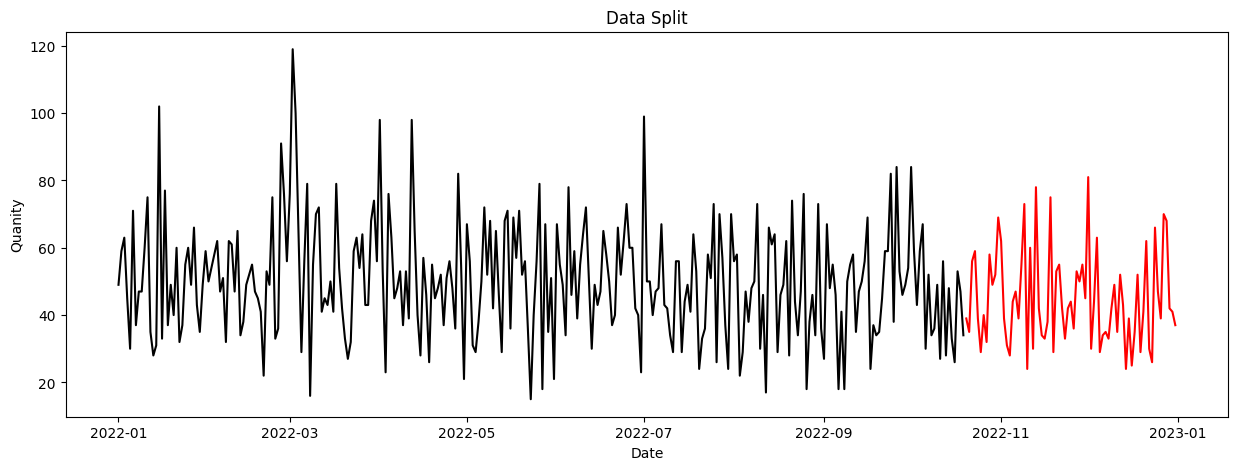

In [ ]:
plt.figure (figsize = (15,5))
plt.plot(df_train, color = "black")
plt.plot(df_test, color = "red")
plt.ylabel("Quanity")
plt.xlabel("Date")
plt.title("Data Split")
plt.show()

From the above results, we can see that the values in the training data (df_train) continue into the testing data (df_test). This indicates that we have successfully split the data as intended.

# <center>Time Series Modelling<center>

## 1. ARIMA Model

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.6 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

### 1. Auto ARIMA

In [ ]:
auto_model = pm.auto_arima (df_train ["Qty"], stepwise = False, seasonal = True)
auto_model

ARIMA(order=(5, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

### 2. Manual ARIMA

In [ ]:
model = ARIMA (df_train, order = [2, 0, 2])
arima_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Model Training

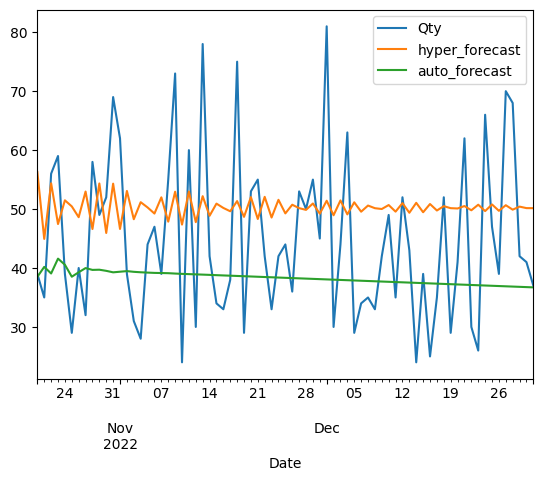

In [ ]:
hyper_forecast = arima_model.forecast(len(df_test))
auto_forecast = auto_model.predict(len(df_test))

df_plot = df_ts.iloc[-73:]

df_plot['hyper_forecast'] = [None]*(len(df_plot)-len(hyper_forecast)) + list(hyper_forecast)
df_plot['auto_forecast'] = [None]*(len(df_plot)-len(auto_forecast)) + list(auto_forecast)

df_plot.plot()
plt.show()

### Forecasting

In [ ]:
model = ARIMA(df_ts, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=31)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Visualize Forecasting

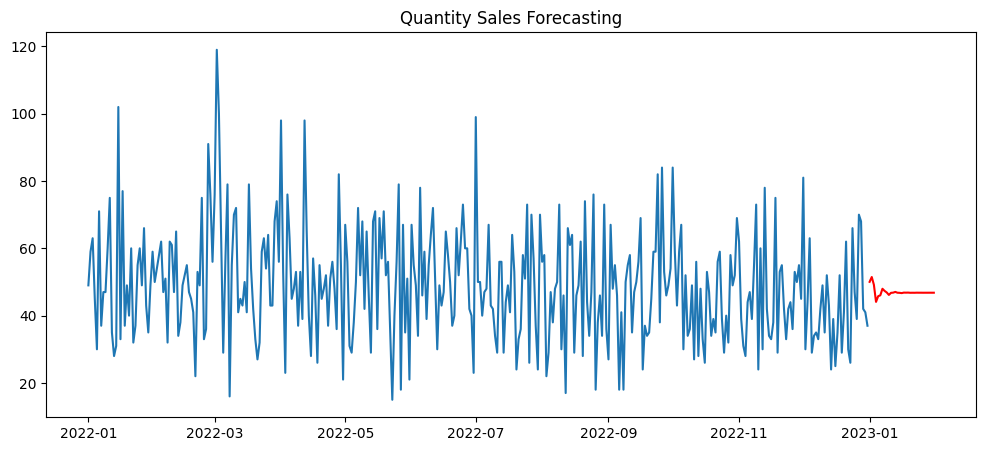

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df_ts)
plt.plot(forecast,color='red')
plt.title('Quantity Sales Forecasting')
plt.show()

In [ ]:
forecast.describe()

count    31.000000
mean     47.036809
std       1.257768
min      44.087210
25%      46.793943
50%      46.810737
75%      46.844962
max      51.478647
Name: predicted_mean, dtype: float64

From the above result we can see that the average of quantity forecasting using Auto ARIMA order is 47 pcs/day. But the result of forecasting is not good enough since the graph shows flat line in our forecast of january 2023. The next step we will try to use SARIMAX.

## 2. SARIMAX Model

In [ ]:
df_sar = df_ts.copy()

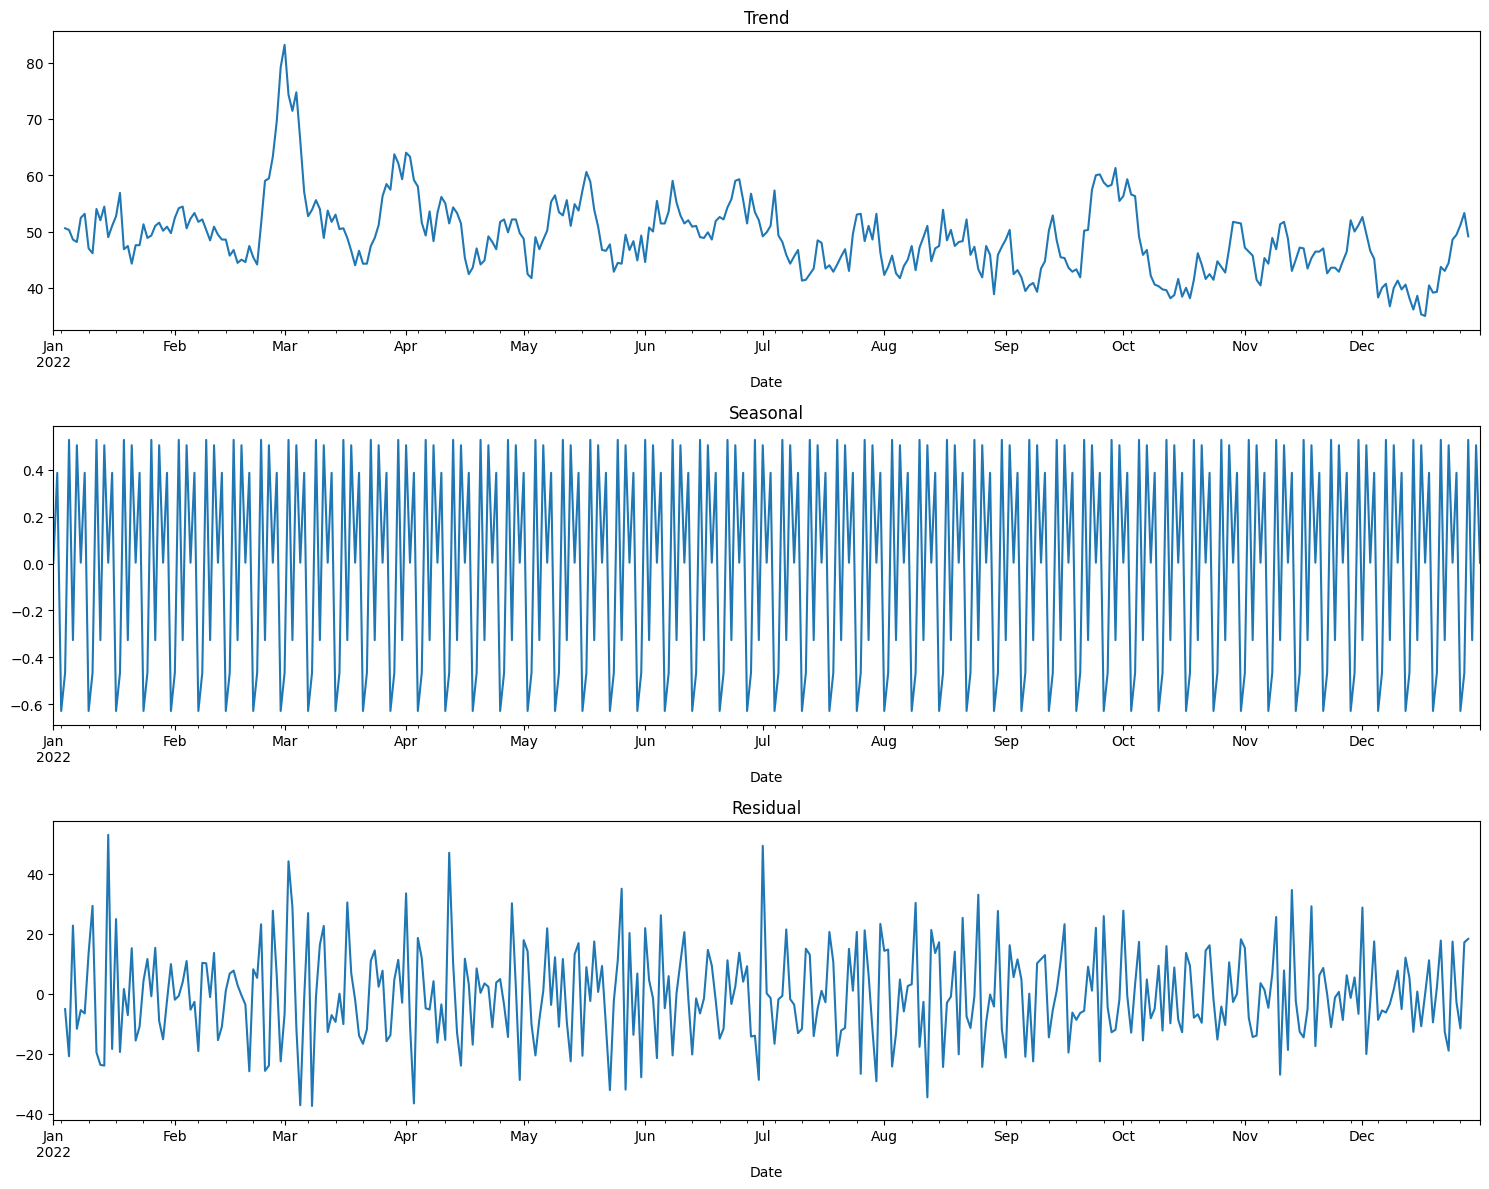

In [ ]:
# Check for the trend seasonality and residual
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_sar)

fig,ax = plt.subplots(3,1,figsize=(15,12))
decompose.trend.plot(ax=ax[0])
ax[0].set_title('Trend')
decompose.seasonal.plot(ax=ax[1])
ax[1].set_title('Seasonal')
decompose.resid.plot(ax=ax[2])
ax[2].set_title('Residual')

plt.tight_layout()
plt.show()

### using .diff(7)

In [ ]:
df_sar ["Diff7"] = df_sar.diff(7)

In [ ]:
 from statsmodels.tsa.stattools import adfuller
print ("Stationarity Test by ADF - Test :\n")
adf_test = adfuller(df_sar ["Diff7"].dropna(), autolag = "AIC")
output = pd.Series(adf_test[0:4], index=["Test Statistic :", "p-value :", "Number of Lags Used :", "Number of Observations Used :"])

for key,value in adf_test[4].items():
    output ["Critical Value (%s) :" %key] = value
print (output)

Stationarity Test by ADF - Test :

Test Statistic :                -8.019503e+00
p-value :                        2.094776e-12
Number of Lags Used :            1.300000e+01
Number of Observations Used :    3.440000e+02
Critical Value (1%) :           -3.449503e+00
Critical Value (5%) :           -2.869979e+00
Critical Value (10%) :          -2.571266e+00
dtype: float64


We can see from the above result that df_sar p-value is less than significant level (2.09 -12 < 0.05). This means that df_sar for quantity after differencing by 7 is stationare

### ACF and PACF

#### 1. Original Dataset

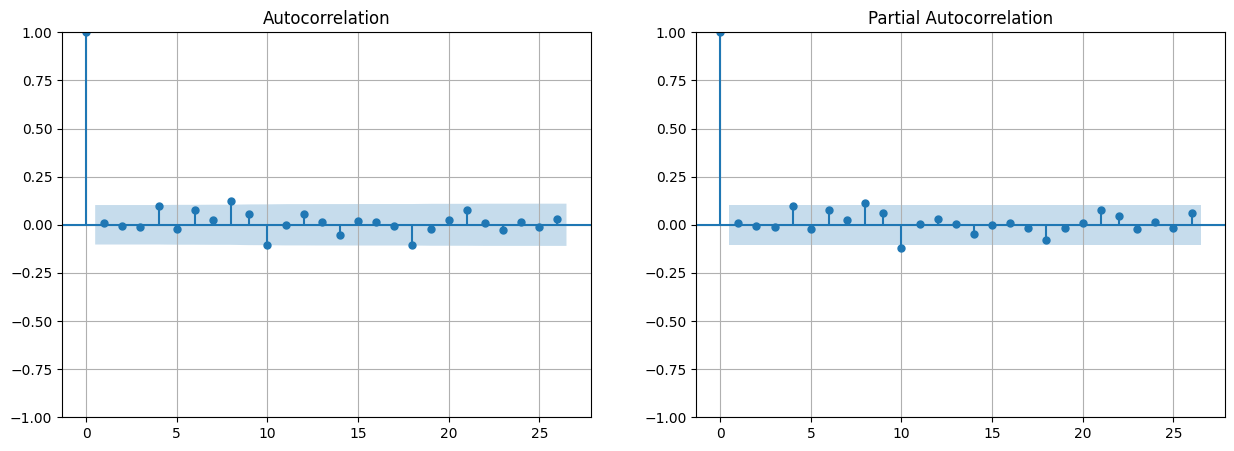

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(df_sar["Qty"], ax=ax[0])
ax[0].grid()
plot_pacf(df_sar["Qty"], ax=ax[1])
ax[1].grid()
plt.show()

From the above result we can see that the ARIMA is (0,0,0) because it.s the original data and we don't use any differencing and there is no significant value from acf and pacf graph

#### 2. Diff7

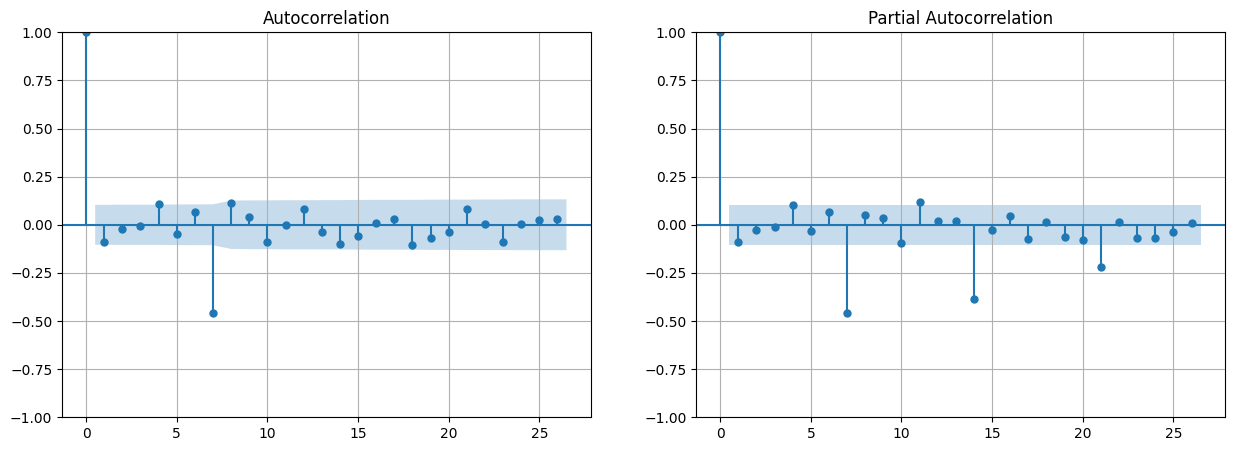

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(df_sar ["Diff7"].dropna(), ax=ax[0])
ax[0].grid()
plot_pacf(df_sar ["Diff7"].dropna(), ax=ax[1])
ax[1].grid()
plt.show()

from the above result, we can see that weather acf or pacf shows the significant value is at lags of 7 and the multiple of it. The presence of significant spikes at these lags suggests a seasonal pattern with a seasonal period of 7 (weekly.

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.SARIMAX (df_test, order = (0,0,0), seasonal_order = (1,1,0,7))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                     Qty   No. Observations:                   73
Model:             SARIMAX(1, 1, 0, 7)   Log Likelihood                -282.476
Date:                 Sun, 03 Sep 2023   AIC                            568.953
Time:                         14:11:30   BIC                            573.332
Sample:                     10-20-2022   HQIC                           570.683
                          - 12-31-2022                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.4767      0.104     -4.596      0.000      -0.680      -0.273
sigma2       297.2722     63.642      4.671      0.000     172.536     422.008
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 2.81
Prob(Q):                              0.81   Prob(JB):                         0.25
Heteroskedasticity (H):               0.78   Skew:                             0.35
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast = model_fit.get_forecast(steps = 31)
forecast_result = forecast.conf_int()
forecast_result ["Forecast Qty"] = model_fit.predict (start= forecast_result.index [0],
                                                      end = forecast_result.index [-1])
forecast_result ["Date"] = pd.date_range (start = "2023-01-01", end = "2023-01-31")
forecast_result.set_index ("Date", inplace = True)
forecast_result.head()

,lower Qty,upper Qty,Forecast Qty
Date,,,
2023-01-01,15.590547,83.176318,49.383432
2023-01-02,0.440250,68.026020,34.233135
2023-01-03,22.383207,89.968977,56.176092
2023-01-04,31.346996,98.932766,65.139881
2023-01-05,2.486877,70.072647,36.279762


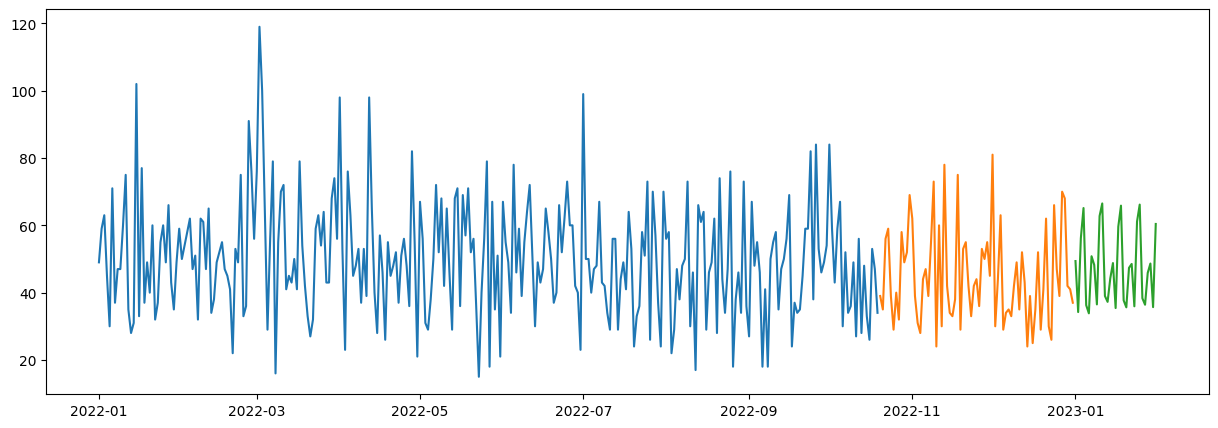

In [ ]:
plt.figure (figsize = (15,5))
plt.plot (df_train)
plt.plot (df_test)
plt.plot (forecast_result ["Forecast Qty"])

In [ ]:
forecast_result.describe()

,lower Qty,upper Qty,Forecast Qty
count,31.000000,31.000000,31.000000
mean,3.917408,90.787896,47.352652
std,13.431187,13.799040,11.322274
min,-20.153464,67.642588,33.849703
25%,-5.999607,81.905864,36.456664
50%,1.571777,89.011439,47.375445
75%,14.649460,100.061011,57.900324
max,31.346996,116.848282,66.503261


We can see that the average forecast from SARIMAX is also 47 pcs/day just like in ARIMA but with better overall result

# <center>Clustering<center>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from itertools import permutations
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
df_merged2 = df_merged.copy()

In [ ]:
df_cluster = df_merged2.groupby('CustomerID').agg({'TransactionID':'count','Qty':'sum','TotalAmount':'sum'})
df_cluster.head()

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600


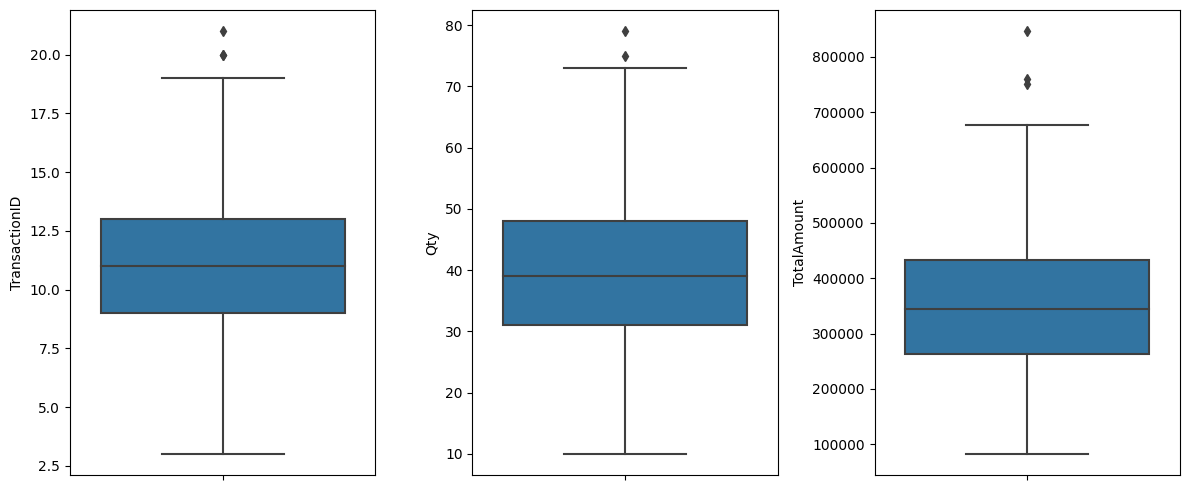

In [ ]:
#Check outliers on new dataset
features = df_cluster.columns
fig, ax = plt.subplots(1,len(df_cluster.columns),figsize=(12,5))
for i in range(0,len(df_cluster.columns)):
    sns.boxplot(data=df_cluster,y=features[i],ax=ax[i])
plt.tight_layout()
plt.show()

There's some outliers but the data is still good, no need to handle outliers right now

In [ ]:
# transformation
X = df_cluster.values
X_ss = StandardScaler().fit_transform(X)
df_ss = pd.DataFrame(data=X_ss,columns=df_cluster.columns)

In [ ]:
df_ss.head()

,TransactionID,Qty,TotalAmount
0,1.859178,1.572638,2.159683
1,0.623871,1.336133,0.302297
2,1.241524,1.257299,0.735687
3,-0.302609,0.468952,-0.419752
4,-1.229088,-1.028907,-0.692329


# Model Clustering

## Elbow Method

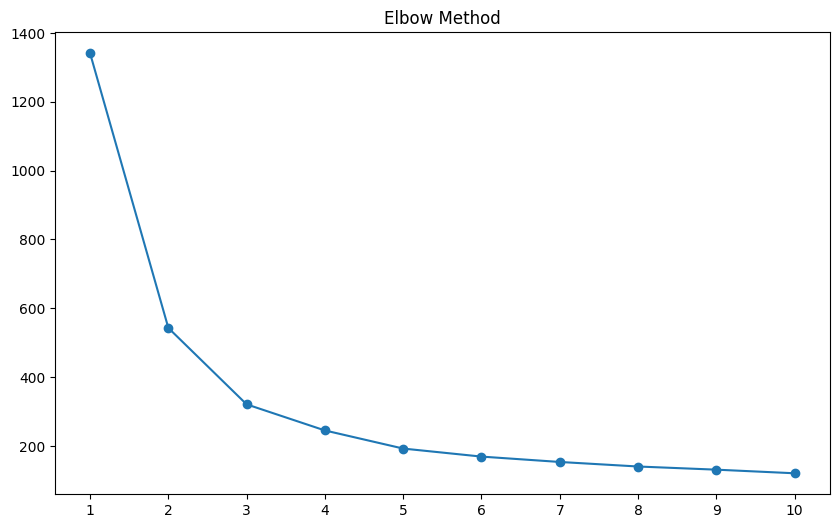

In [ ]:
#Elbow method
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df_ss.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.xticks(list(range(1,11)))
plt.plot(range(1,11),inertia,marker='o')
plt.title('Elbow Method')
plt.show()

Elbow method the optimal cluster is when n = 3

In [ ]:
# Kmeans n_cluster = 3

kmeans_3 = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans_3.fit(X_ss)

df_clust3 = pd.DataFrame(data=X_ss,columns=df_cluster.columns)
df_clust3['Cluster'] = kmeans_3.labels_
df_clust3.head(3)

,TransactionID,Qty,TotalAmount,Cluster
0,1.859178,1.572638,2.159683,2
1,0.623871,1.336133,0.302297,2
2,1.241524,1.257299,0.735687,2


<Figure size 400x400 with 0 Axes>

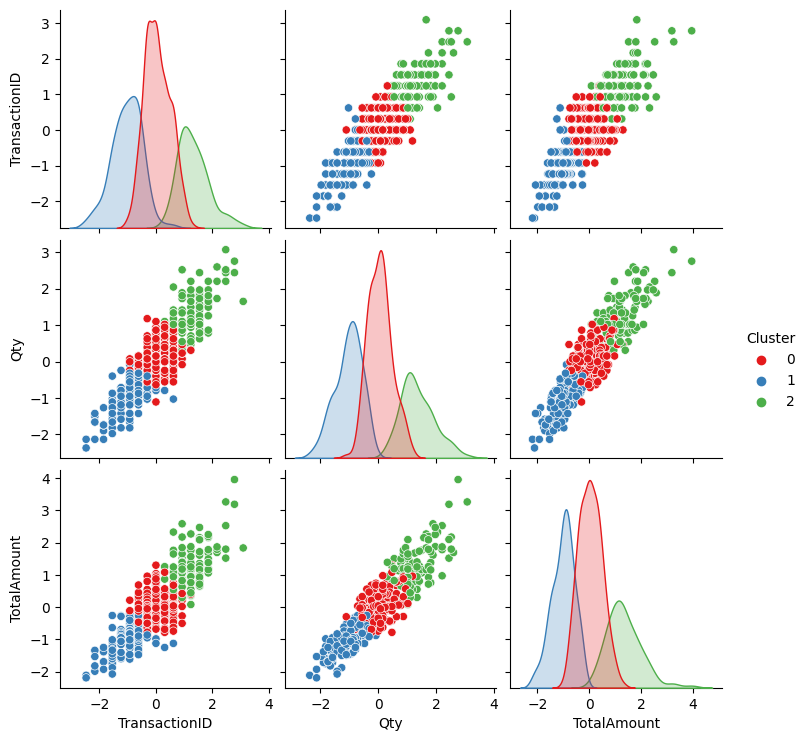

In [ ]:
#PLot Before PCA
plt.figure(figsize=(4,4))
sns.pairplot(data=df_clust3, hue= "Cluster",palette='Set1')
plt.show()

We can see from the above plot, the cluster has separated well

## PCA

In [ ]:
#PCA
pc_3 = PCA(n_components=2).fit_transform(X_ss)
df_pc3 = pd.DataFrame(data=pc_3,columns=["pc_1", "pc_2"])
df_pc3['Cluster'] = df_clust3 ["Cluster"]
df_pc3.describe().T

,count,mean,std,min,25%,50%,75%,max
pc_1,447.0,-3.973953e-17,1.661923,-4.008984,-1.107778,-0.139108,1.067128,5.483099
pc_2,447.0,-5.960929e-18,0.386697,-1.271043,-0.236561,-0.020583,0.241654,1.359429
Cluster,447.0,7.897092e-01,0.795493,0.000000,0.000000,1.000000,1.000000,2.000000


### PCA Visualiziation

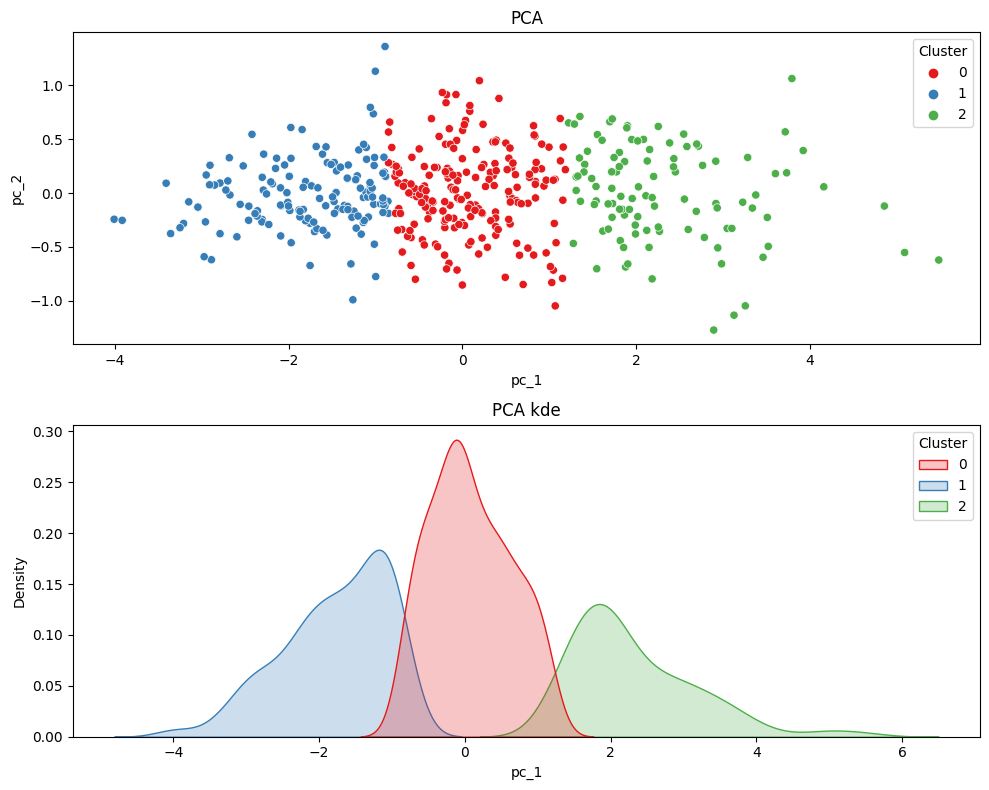

In [ ]:
#PCA plot

fig,ax = plt.subplots(2,1,figsize=(10,8))

sns.scatterplot(data = df_pc3, x= "pc_1", y = "pc_2", hue = "Cluster", palette = "Set1", ax = ax[0])
ax[0].set_title("PCA")

sns.kdeplot(data = df_pc3, x= "pc_1" ,hue = "Cluster", palette = "Set1", fill = True, ax = ax[1])
ax[1].set_title('PCA kde')
plt.tight_layout()
plt.show()

## Sillhouette analysis

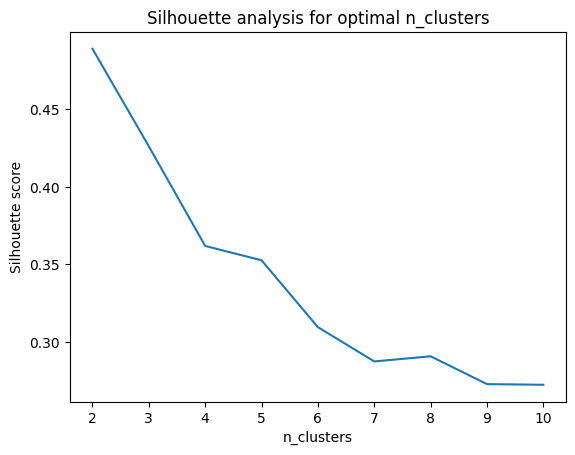

In [ ]:
n_clust = list (range (2,11))

avg_silhouette = []
for i in n_clust:
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    labels = kmeans.fit_predict(X_ss)
    avg_silhouette.append(silhouette_score (X_ss, labels))

plt.title("Silhouette analysis for optimal n_clusters")
plt.plot(n_clust, avg_silhouette)
plt.xlabel("n_clusters")
plt.ylabel("Silhouette score")
plt.show()

In [ ]:
from matplotlib import cm

For n_clusters = 2 The average silhouette_score is : 0.4888692358695996
For n_clusters = 3 The average silhouette_score is : 0.4260368315045846
For n_clusters = 4 The average silhouette_score is : 0.3618345210232252


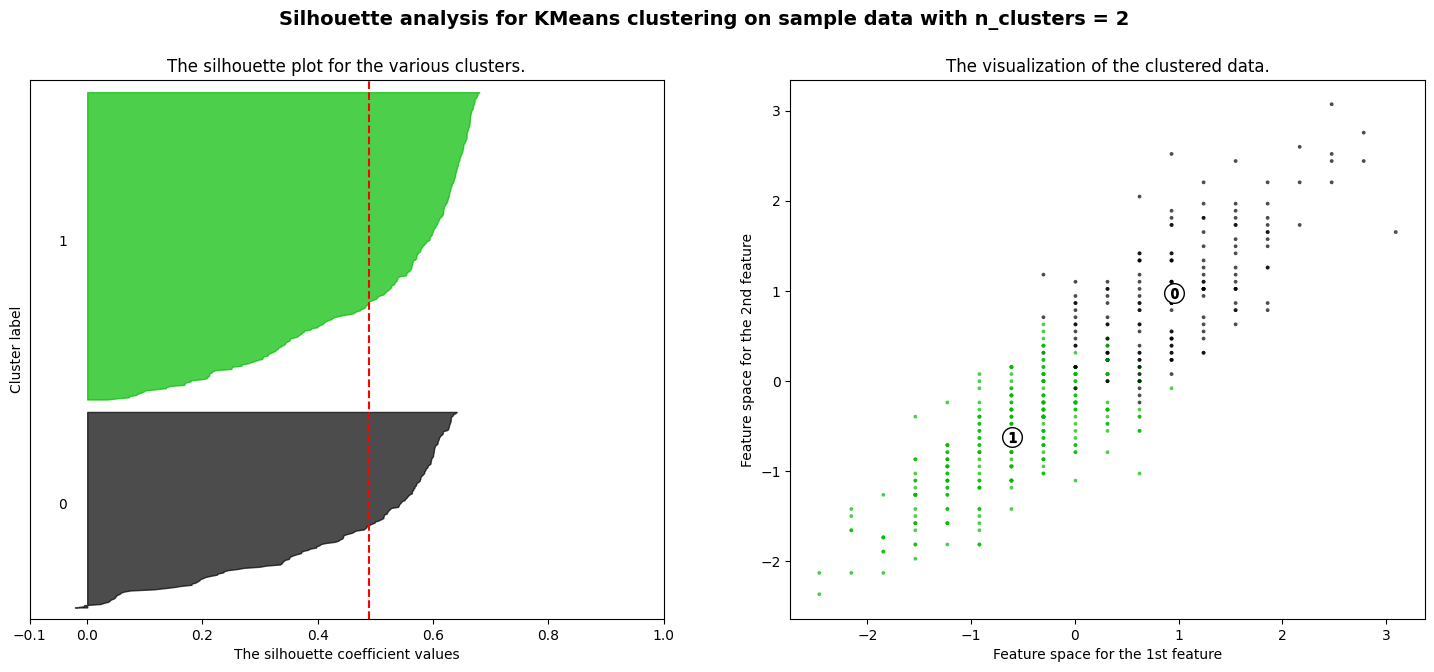

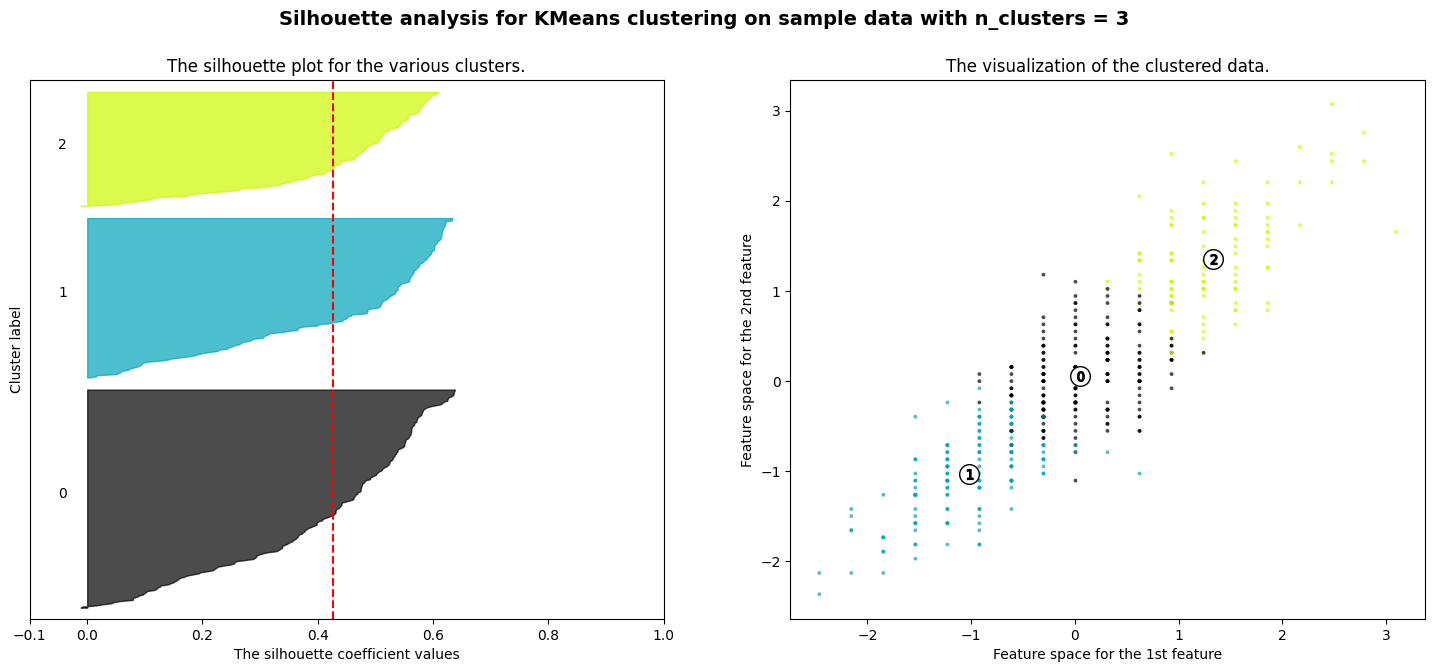

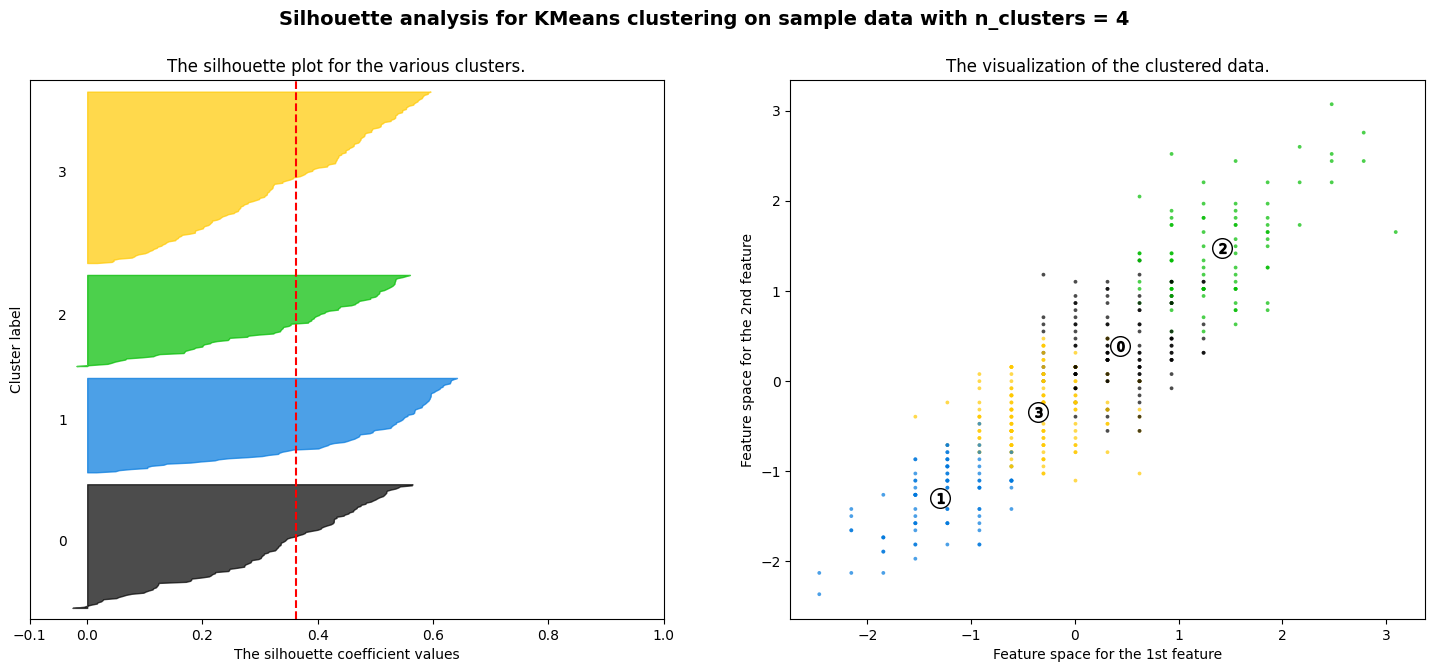

In [ ]:
range_n_clusters = [2,3, 4]
X = X_ss
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++',max_iter=300,n_init=10,random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    avg_silhouette = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        avg_silhouette)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=avg_silhouette, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters, fontsize=14, fontweight="bold")

plt.show()

Based on Silhouette analysis, the cluster with n = 2 has the highest Silhouette score at 0.48, indicating a relatively good separation of data points within clusters. However, when examining the plot, the cluster with n = 3 appears to be even more distinctly separated, despite having a slightly lower Silhouette score of 0.42.

## Business Recommendation

In [ ]:
df_result = pd.DataFrame(data=df_cluster,columns=df_cluster.columns)
df_result['Cluster'] = kmeans_3.labels_
df_result.reset_index().head(3)

,CustomerID,TransactionID,Qty,TotalAmount,Cluster
0,1,17,60,623300,2
1,2,13,57,392300,2
2,3,15,56,446200,2


In [ ]:
df_result.shape

(447, 4)

In [ ]:
df_result ['CustomerID'] = df_merged2['CustomerID']
df_result = df_result.groupby("Cluster").agg({"CustomerID" : "count",
                                              "Qty" : "mean",
                                              "TotalAmount" : "mean"}).reset_index()
df_result.columns = ["Cluster", "Total Customer", "Avg Qty", "Avg TotalAmount"]
df_result

,Cluster,Total Customer,Avg Qty,Avg TotalAmount
0,0,198,40.681818,359373.737374
1,1,145,26.868966,228703.448276
2,2,104,57.230769,521486.538462


Business Recommendation Based on Customer charcteristic cluster :
1. Cluster 0 : Highest total customer, moderate average quantity and total amount
>  Focus on customer retention, implement loyalty programs, personalized recommendations, and excellent customer service to maintain and potentially increase their spending. Consider identifying and offering complementary products to boost their total spending.

2. Cluster 1 : Moderate total customer, lowet average quantity and total amount
> Explore strategies to increase the average transaction value. This may involve bundling products, offering discounts for bulk purchases, or launching targeted promotions to encourage higher spending per transaction.

3. Cluster 2 : Lowest total customer but has highest average quantity and total amount
>  Engage with these high-value customers. Provide premium services, personalized recommendations, and exclusive offers to maintain their loyalty. Continuously monitor their preferences and adapt the product offerings to meet their needs.